<a href="https://colab.research.google.com/github/Nayan-Bebale/object-detection-models-hub/blob/main/TorchModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Overview of Object Detection Models in `torchvision`**

Object detection is a computer vision task that involves identifying and localizing objects within an image. Different models specialize in this task, balancing accuracy and speed to suit various applications, such as real-time detection, high accuracy requirements, or low-resource environments. Below are the models used in the code and an explanation of their capabilities:

1. **Faster R-CNN with ResNet-50 Backbone (`fasterrcnn_resnet50_fpn`)**
   - **Description**: Faster R-CNN (Region-based Convolutional Neural Network) is one of the most popular object detection models. It uses a two-stage process: the first stage proposes regions (potential locations of objects), and the second stage classifies these regions and refines their boundaries.
   - **Backbone**: The ResNet-50 backbone is a 50-layer deep convolutional network known for its excellent feature extraction capabilities, thanks to residual learning. The Feature Pyramid Network (FPN) enhances the model's ability to detect objects at multiple scales.
   - **Use Case**: Suitable for scenarios requiring high accuracy in object detection, such as security systems, wildlife monitoring, or any application where precise detection is crucial.

2. **Faster R-CNN with MobileNetV3 Large (`fasterrcnn_mobilenet_v3_large_fpn`)**
   - **Description**: This variant of Faster R-CNN uses MobileNetV3 as the backbone, which is a lightweight and efficient network designed for mobile and embedded devices.
   - **Backbone**: MobileNetV3 Large is optimized for speed and efficiency, making it suitable for real-time applications on devices with limited computational power.
   - **Use Case**: Ideal for mobile and embedded systems where speed is critical and resources are limited, such as mobile apps, drones, and IoT devices.

3. **Faster R-CNN with ResNet-50 FPN V2 (`fasterrcnn_resnet50_fpn_v2`)**
   - **Description**: This is an updated version of the Faster R-CNN model with improvements in backbone architecture, enhancing performance on various benchmarks.
   - **Backbone**: The ResNet-50 FPN V2 has improvements in its feature extraction capabilities, which can lead to slightly better accuracy in detection.
   - **Use Case**: Suitable for general-purpose object detection tasks where the balance of speed and accuracy is essential.

4. **Mask R-CNN with ResNet-50 FPN (`maskrcnn_resnet50_fpn`)**
   - **Description**: Mask R-CNN extends Faster R-CNN by adding a third branch for predicting segmentation masks on each detected object, making it capable of instance segmentation (delineating each object precisely).
   - **Backbone**: Uses the ResNet-50 backbone with FPN for robust feature extraction.
   - **Use Case**: Perfect for applications needing object detection with pixel-level segmentation, such as medical image analysis, autonomous driving, and any scenario where object boundaries need to be identified.

5. **Mask R-CNN with ResNet-50 FPN V2 (`maskrcnn_resnet50_fpn_v2`)**
   - **Description**: An enhanced version of the Mask R-CNN with improvements in the network architecture.
   - **Backbone**: ResNet-50 FPN V2 improves upon the original with better detection and segmentation capabilities.
   - **Use Case**: Enhanced segmentation performance makes it suitable for advanced computer vision tasks in industries like robotics and healthcare.

6. **Keypoint R-CNN with ResNet-50 FPN (`keypointrcnn_resnet50_fpn`)**
   - **Description**: Keypoint R-CNN is a specialized variant of Faster R-CNN designed for detecting human keypoints (e.g., body joints). It is commonly used for pose estimation tasks.
   - **Backbone**: ResNet-50 FPN enhances its ability to detect keypoints with high precision.
   - **Use Case**: Used in pose estimation for fitness apps, sports analysis, human-computer interaction, and animation.

7. **RetinaNet with ResNet-50 FPN (`retinanet_resnet50_fpn`)**
   - **Description**: RetinaNet is a one-stage object detection model known for its high performance and efficiency. It uses a novel loss function called Focal Loss to handle class imbalance, making it particularly effective for detecting smaller objects.
   - **Backbone**: ResNet-50 FPN enhances feature extraction, allowing the detection of objects at various scales.
   - **Use Case**: Great for real-time applications, including drone surveillance, robotics, and other scenarios where speed and accuracy are balanced.

8. **SSD300 with VGG16 Backbone (`ssd300_vgg16`)**
   - **Description**: SSD (Single Shot MultiBox Detector) is a one-stage object detection model that combines speed and accuracy by predicting bounding boxes and classes in a single forward pass.
   - **Backbone**: VGG16 provides robust feature extraction, though it’s slightly older compared to newer architectures like ResNet.
   - **Use Case**: Used in real-time applications where computational efficiency is key, such as embedded systems and robotics.

9. **SSDLite320 with MobileNetV3 Large (`ssdlite320_mobilenet_v3_large`)**
   - **Description**: SSDLite is a lightweight version of SSD designed for low-power devices. It uses depthwise separable convolutions to reduce computation.
   - **Backbone**: MobileNetV3 Large provides an efficient and lightweight structure, making it optimal for mobile and embedded systems.
   - **Use Case**: Ideal for mobile apps and low-power devices that require efficient object detection, such as AR/VR applications.

### **Why Use These Models?**

- **Versatility**: These models cover a range of object detection tasks, from basic bounding box detection to advanced tasks like instance segmentation and keypoint detection.
- **Performance**: They provide a balance between speed and accuracy, catering to different needs based on computational resources and application requirements.
- **Ease of Use**: Available through the `torchvision` library, these models come pretrained on the COCO dataset, which is a large-scale object detection dataset, making them ready to use without extensive retraining.
- **Customizability**: These models can be fine-tuned on specific datasets to enhance performance on specialized tasks.

These models form the backbone of many real-world applications, allowing developers to integrate powerful object detection capabilities into their projects efficiently.

In [11]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import (
    fasterrcnn_resnet50_fpn,
    fasterrcnn_mobilenet_v3_large_fpn,
    fasterrcnn_resnet50_fpn_v2,
    maskrcnn_resnet50_fpn,
    maskrcnn_resnet50_fpn_v2,
    keypointrcnn_resnet50_fpn,
    retinanet_resnet50_fpn,
    ssd300_vgg16,
    ssdlite320_mobilenet_v3_large,
)
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [2]:
# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane",
    "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
    "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork",
    "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange",
    "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "dining table", "toilet", "TV",
    "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave",
    "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase",
    "scissors", "teddy bear", "hair drier", "toothbrush"
]

In [12]:
# Function to load the specified model
def load_model(model_name="fasterrcnn"):
    if model_name == "fasterrcnn":
        model = fasterrcnn_resnet50_fpn(pretrained=True)
    elif model_name == "fasterrcnn_mobilenet":
        model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
    elif model_name == "fasterrcnn_v2":
        model = fasterrcnn_resnet50_fpn_v2(pretrained=True)
    elif model_name == "maskrcnn":
        model = maskrcnn_resnet50_fpn(pretrained=True)
    elif model_name == "maskrcnn_v2":
        model = maskrcnn_resnet50_fpn_v2(pretrained=True)
    elif model_name == "keypointrcnn":
        model = keypointrcnn_resnet50_fpn(pretrained=True)
    elif model_name == "retinanet":
        model = retinanet_resnet50_fpn(pretrained=True)
    elif model_name == "ssd":
        model = ssd300_vgg16(pretrained=True)
    elif model_name == "ssdlite":
        model = ssdlite320_mobilenet_v3_large(pretrained=True)
    else:
        raise ValueError(f"Unsupported model: {model_name}")

    model.eval()
    return model

In [13]:
def perform_object_detection(image_path, model_name="fasterrcnn"):
    # Load the specified model
    model = load_model(model_name)

    # Load and preprocess the image
    if image_path.startswith('http'):  # If the input is a URL
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_path).convert("RGB")

    transform = transforms.ToTensor()
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform object detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Threshold score for displaying detections
    threshold_score = 0.5

    # Check if model is SSD to adjust outputs
    if model_name == "ssd":
        boxes = predictions[0]['boxes']
        scores = predictions[0]['scores']
        labels = predictions[0]['labels']
    else:
        boxes = predictions[0]['boxes']
        scores = predictions[0]['scores']
        labels = predictions[0]['labels']

    for i, (box, score) in enumerate(zip(boxes, scores)):
        if score > threshold_score:
            x1, y1, x2, y2 = box
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2))
            label = COCO_INSTANCE_CATEGORY_NAMES[int(labels[i])]
            plt.text(x1, y1, f'{label}: {score:.2f}', color='blue', fontsize=10)

    plt.axis('off')
    plt.show()

In [27]:
image_path = "https://raw.githubusercontent.com/Nayan-Bebale/object-detection-models-hub/refs/heads/main/testImage.jpeg"

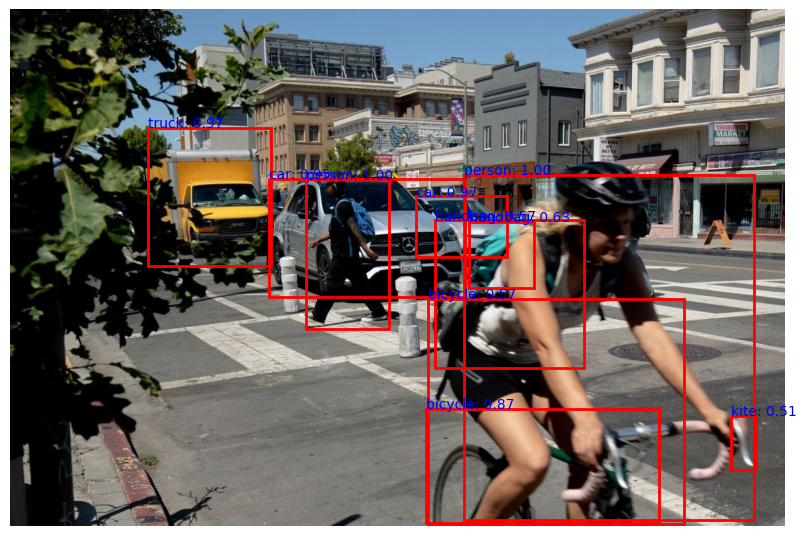

In [9]:
# perform_object_detection(image_path=image_path, model_name="fasterrcnn")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth
100%|██████████| 13.4M/13.4M [00:00<00:00, 57.4MB/s]


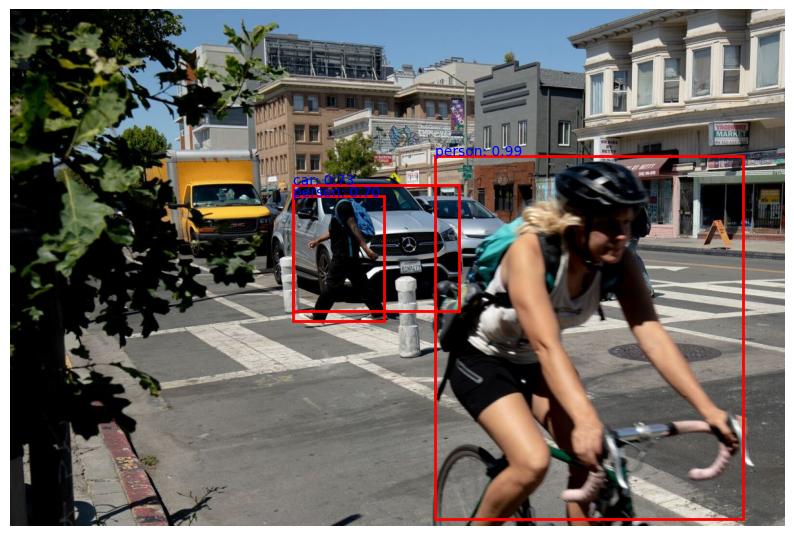

In [15]:
perform_object_detection(image_path=image_path, model_name="ssdlite") # Use SSD Lite

In [23]:
def get_user_input():
    # Define available models and their corresponding functions
    models = {
        '1': 'fasterrcnn',
        '2': 'fasterrcnn_mobilenet',
        '3': 'fasterrcnn_v2',
        '4': 'maskrcnn',
        '5': 'maskrcnn_v2',
        '6': 'keypointrcnn',
        '7': 'retinanet',
        '8': 'ssd',
        '9': 'ssdlite'
    }

    print("Select a model for object detection:")
    for key, model in models.items():
        print(f"{key}: {model}")

    # Get user input for the model
    model_choice = input("Enter the number corresponding to the model you want to use: ")

    # Validate model choice
    if model_choice not in models:
        print("Invalid choice. Please select a valid model.")
        return None, None

    # Get user input for the image location
    image_path = input("Enter the image location (path to the image file): ")

    model_name = models[model_choice]

    if model_name and image_path:
      # Call the perform_object_detection function with the chosen model and image location
      return perform_object_detection(image_path, model_name=model_name)

    return "try again"


Select a model for object detection:
1: fasterrcnn
2: fasterrcnn_mobilenet
3: fasterrcnn_v2
4: maskrcnn
5: maskrcnn_v2
6: keypointrcnn
7: retinanet
8: ssd
9: ssdlite
Enter the number corresponding to the model you want to use: 1
Enter the image location (path to the image file): https://raw.githubusercontent.com/Nayan-Bebale/object-detection-models-hub/refs/heads/main/testImage.jpeg
fasterrcnn


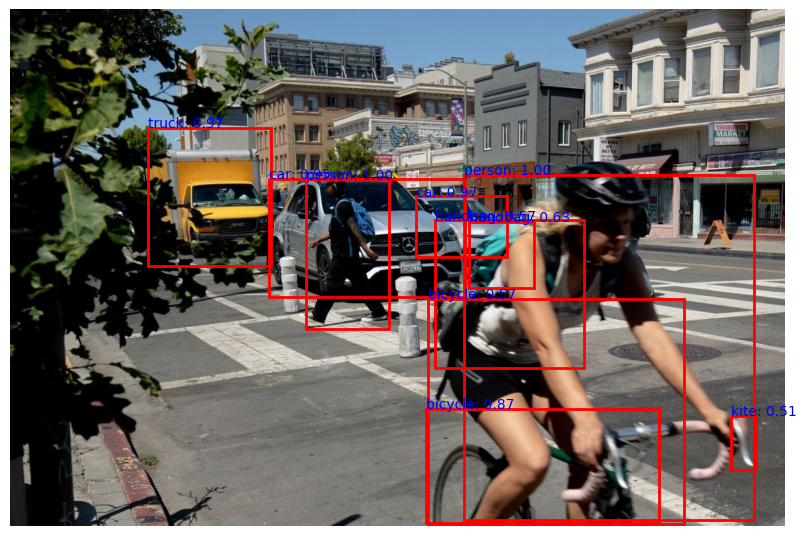

'try again'

In [26]:
get_user_input()

In [ ]:
#